# CZEA Fellowships Statistics

## All Seasons (2021 - 2023)

,Applications,Participants,Completions (6 or more sessions),Total attendance,Mean attendance,Dropout,Completions rate
All seasons,270,171,107,955,4.0,30.8,43.3


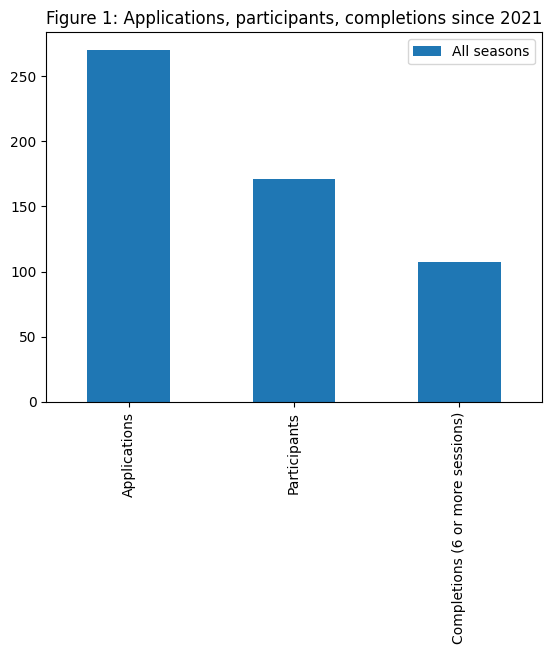

In [9]:
import pandas as pd
import os

def get_data(data_file, columns_file):
    input_path = os.path.join(os.getcwd(), "datasets")
    columns = pd.read_csv(os.path.join(input_path, columns_file), sep="\t", header=None)
    columns = columns[0].str.partition(" (from ")[0].tolist()
    columns.insert(0, "Name")
    return pd.read_csv(os.path.join(input_path, data_file), sep="\t", names=columns)

data_file = "Untitled spreadsheet - Sheet1.tsv"
columns_file = "Untitled spreadsheet - Sheet2.tsv"
df = get_data(data_file, columns_file)

def report(df, index, df0=df):
    report_df = pd.DataFrame(index=[index])
    report_df['Applications'] = len(df)
    report_df['Participants'] = len(df[df['Participation'] > 0])
    report_df['Completions'] = len(df[df['Participation'] > 5])
    report_df['Total attendance'] = int(df['Participation'].sum())

    seasons_list = sorted(df0.Season.unique())
    past_seasons_filter = df.Season != seasons_list[-1]
    past_seasons_df = df[past_seasons_filter]
    participation_filter = past_seasons_df['Participation'] > 0
    completion_filter = past_seasons_df['Participation'] > 5
    if len(past_seasons_df) > 0:
        report_df['Mean attendance'] = df['Participation'].mean().round(1)
        report_df['Dropout'] = (len(past_seasons_df) - len(past_seasons_df[participation_filter])) / len(past_seasons_df) * 100
        report_df['Completions rate'] = len(past_seasons_df[completion_filter]) / len(past_seasons_df) * 100
        report_df['Dropout'] = report_df.Dropout.round(1)
        report_df['Completions rate'] = report_df['Completions rate'].round(1)
    else:
        report_df[['Dropout','Mean attendance','Completions rate','Participants','Completions','Total attendance']] = ""

    return report_df

def report_column(column, df):
    
    split_column = df[column].str.split(', ')
    items_list = split_column.explode().value_counts().reset_index()
    items_list.columns = ['Item', 'Count']
    items_list = items_list.Item.sort_values()

    reports = []
    for i in items_list:
        filter = df[column].str.find(i) > -1
        reports.append(report(df[filter], i))

    report_df = pd.concat(reports)
    return report_df

report_df = report(df,"All seasons")
report_df = report_df.rename(columns={"Completions":"Completions (6 or more sessions)"})
report_df[["Applications", "Participants", "Completions (6 or more sessions)"]].transpose().plot.bar(title="Figure 1: Applications, participants, completions since 2021")
report_df


### Basic statistics - breakdown by seasons

In [10]:
report_df = report_column("Season", df)
report_df.index = report_df.index.str.replace("jaro", "spring").str.replace("podzim", "fall")
report_df

,Applications,Participants,Completions,Total attendance,Mean attendance,Dropout,Completions rate
2021 spring,42,30,24,199,4.9,28.6,57.1
2021 fall,33,23,16,133,4.6,30.3,48.5
2022 spring,44,28,20,167,3.8,36.4,45.5
2022 fall,51,36,16,183,3.8,29.4,31.4
2023 spring,77,54,31,273,3.6,29.9,40.3
2023 fall,23,,,,,,


## Spring 2023 Fellowships Evaluation

The last run of our EA fellowships was by far the most successful in terms of number of applications (77) and participants (54) (see Figure 2). We hit the record also in number of people who attended 6 or more sessions in a seminar (31). 

But we could improve in completion rate (the percentage of people who get from the apllication to attending 6 or more sessions in a seminar), which was 40% - better than the previous run, but significantly worse than in our first fellowship runs (see Figure 3). 

<Axes: title={'center': 'Figure 2: Applications, participants, completions by seasons'}>

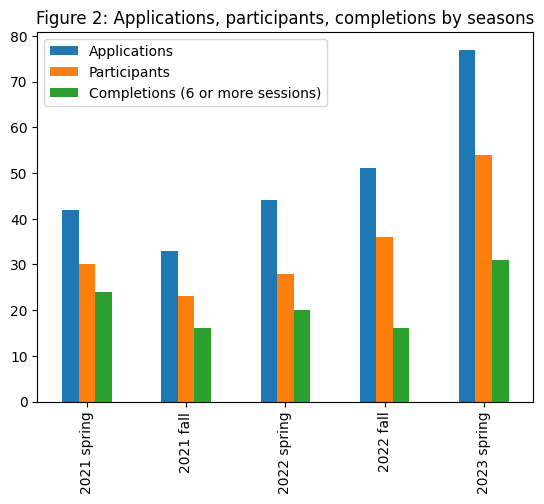

In [11]:
report_df = report_df.rename(columns={"Completions":"Completions (6 or more sessions)"})
report_df[["Applications", "Participants", "Completions (6 or more sessions)"]].drop("2023 fall").plot.bar(title="Figure 2: Applications, participants, completions by seasons")

<Axes: title={'center': 'Figure 3: Completion rate by seasons'}>

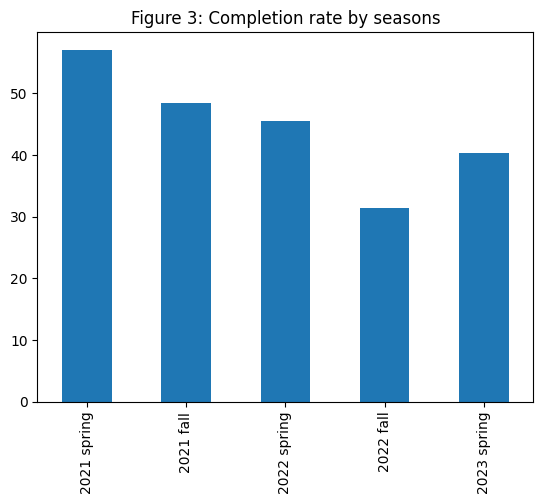

In [12]:
report_df["Completions rate"].drop("2023 fall").plot.bar(title="Figure 3: Completion rate by seasons")

,Applications,Participants,Completions (6 or more sessions),Total attendance,Mean attendance,Dropout,Completions rate
AI safety seminář,78,47,29,242,3.8,27.7,44.6
Prague Season seminář,22,13,3,53,2.6,40.9,13.6
seminář Kariéra s pozitivním dopadem,16,9,4,44,3.7,25.0,33.3
úvodní Seminář o efektivním altruismu,181,120,77,688,4.1,30.6,44.5


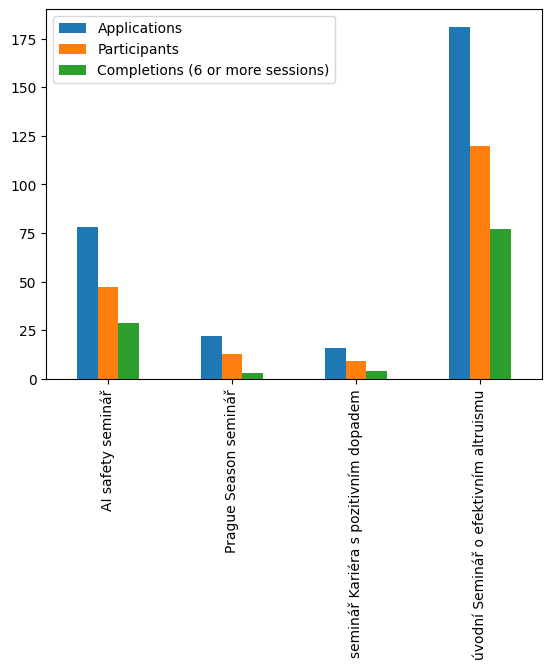

In [13]:
report_df = report_column("Seminar", df)
report_df = report_df.rename(columns={"Completions":"Completions (6 or more sessions)"})
report_df[["Applications", "Participants", "Completions (6 or more sessions)"]].plot.bar()
report_df

In [14]:

data_file = "Untitled spreadsheet - Sheet3.tsv"
columns_file = "Untitled spreadsheet - Sheet4.tsv"
#df0 = get_data(data_file, columns_file)

def update_df(df, df0):
    rows = []
    for r in range(len(df0)):
        if df0.iloc[df0.last_valid_index()-r].Email == df.iloc[df.last_valid_index()].Email:
            return pd.concat([df,pd.DataFrame(rows)],ignore_index=True)
        else:
            rows.insert(0,pd.Series(df0.iloc[df0.last_valid_index()-r],index=df.columns))
            rows[0].Run = "2023 podzim"
    return pd.concat([df,pd.DataFrame(rows)],ignore_index=True)

#df = update_df(df, df0)